In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import sys

In [2]:
# Functions from PCLCovariance project
# https://github.com/damonge/PCLCovariance/blob/master/notebooks/common.py
FIGSIZE = (4, 3)
def plot_chi2(chi2s, labels, lmax, bins=60, foutput=None):
    "Copied from https://github.com/damonge/PCLCovariance/blob/master/notebooks/common.py"
    f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
    _, x, _ = ax.hist(chi2s, bins=bins, histtype='step', density=True, label=labels)

    ax.plot(x[:-1], stats.chi2.pdf(x[:-1], lmax), ls='--', label=r'$\chi^2$ pdf')

    ax.set_xlabel(r'$\chi^2$')
    ax.set_ylabel('pdf')

    ax.legend(loc=0)
    plt.tight_layout()
    if foutput is not None:
        fname = foutput + '_chi2'
        plt.savefig(fname, dpi=DPI)
    plt.show()
    plt.close()

In [4]:
CovSims = np.load('sims/run_gc0gc0_covSims_0001-0100.npz')['arr_0']
CovTh = np.load('sims/run_gc0gc0_covTh.npz')['arr_0']
# CovTh = np.load('/mnt/extraspace/gravityls_3/S8z/Cls/all_together/new_fiducial_cov/cov_DESgc0_DESgc0_DESgc0_DESgc0.npz')['arr_0']

iCovSims = np.linalg.inv(CovSims)
iCovTh = np.linalg.inv(CovTh)

gc0gc0 = np.load('sims/run_gc0gc0_clsims_0001-0100.npz')
ells = gc0gc0['l']
cls_sims = gc0gc0['cl00'][:, 0, :]
nsims = cls_sims.shape[0]
cls_sims_mean = np.mean(cls_sims, axis=0)

In [5]:
chi2_sims = np.ones(nsims) * (-1)
chi2_Th = np.ones(nsims) * (-1)

for i in range(nsims):
    delta = cls_sims[i] - cls_sims_mean
    chi2_sims[i] = (delta).dot(iCovSims).dot(delta)
    chi2_Th[i] = (delta).dot(iCovTh).dot(delta)

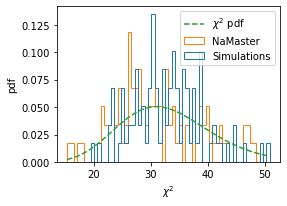

In [8]:
plot_chi2([chi2_sims, chi2_Th], ['Simulations', 'NaMaster'], ells.size)